### Classification in Business

<center>
    <img src = 'images/uci_biz.png' />
</center>



------------


For this try-it, you are to explore some available datasets related to business applications of classification.  Using a dataset from the UCI Machine Learning Repository, scan datasets   under the subject area "BUSINESS" [link here](https://archive.ics.uci.edu/datasets?skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Business).  Find a dataset that looks interesting to you and decide how you could use Logistic Regression to help make a business decision using the data. 

In sharing your results, be sure to clearly describe the following:

- the dataset and its features
- the classification problem -- what are you classifying here?
- a business decision that can be supported using the results of the classification model

Share your summary on the appropriate discussion board for the activity. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# load data
df = pd.read_csv('pricerunner_aggregate.csv')


df.columns = ['ProductID','Title','MerchantID','ClusterID','ClusterLabel','CategoryID','CategoryLabel']
df.head()


,ProductID,Title,MerchantID,ClusterID,ClusterLabel,CategoryID,CategoryLabel
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from category_encoders import JamesSteinEncoder

df =df.sample(frac=0.1, random_state=42)
df.dropna(inplace=True)
X = df.drop(['ClusterLabel','ClusterID'], axis=1)
y= df.ClusterLabel

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# train model
#selector = make_column_selector(dtype_include=object )
#transformer = make_column_transformer((OneHotEncoder(drop = 'first'), selector),
#                                     remainder = StandardScaler())

#text_transformer = TfidfVectorizer(stop_words='english')

transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), make_column_selector(dtype_include=int )),
        #('text', TfidfVectorizer(stop_words='english'), make_column_selector(dtype_include=object)),
       ('cat', JamesSteinEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=object)) # Changed back to OneHotEncoder
    ],
    remainder='passthrough'
)

#jamestime and target encoding. categorical encoding.
#                    
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'saga' ,random_state = 42))

model = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

model.fit(X_train, y_train)

# evaluate model
#y_pred = model.predict(X_test)
#y_pred_proba = model.predict_proba(X_test)[:, 1]



C:\Users\prove\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
C:\Users\prove\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\prove\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_o

,steps,"[('transformer', ...), ('selector', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [6]:
lgr_pipe =model


conf_matrix = confusion_matrix(y_test, lgr_pipe.predict(X_test))
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]

print("Confusion Matrix")
print("FP: ", fp)
print("FN: ", fn)

#visualize
ConfusionMatrixDisplay(conf_matrix).plot()


ValueError: Input X contains NaN.
SelectFromModel does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


Micro-averaged AUC score: 1.00


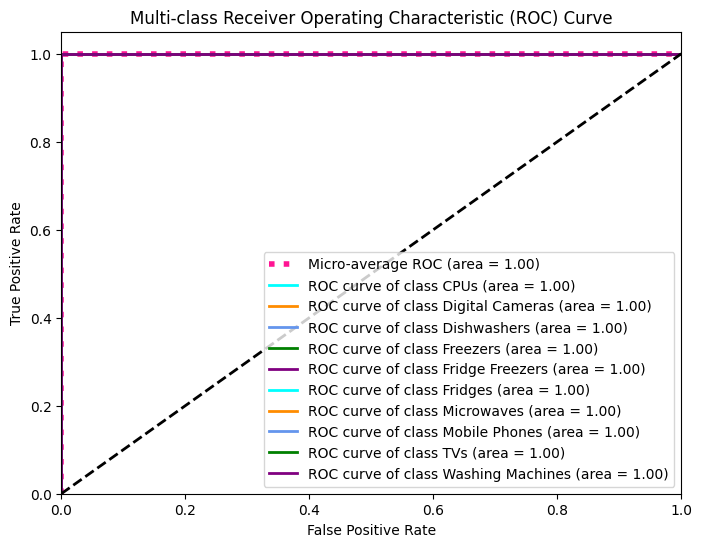

The Micro-averaged multi-class AUC score is: 1.0000


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# ... (Previous code to define X_test, y_test, and trained model_pipeline) ...
model_pipeline = model

# 1. Binarize the output labels for OvR calculation
# This turns labels like ['A', 'B', 'C'] into a binary matrix format
y_test_bin = label_binarize(y_test, classes=model_pipeline.classes_)
n_classes = y_test_bin.shape[1]

# 2. Get the probability estimates for the test set
# We need probabilities for the ROC curve, not just final predictions (y_pred)
y_score = model_pipeline.predict_proba(X_test)

# 3. Calculate ROC curve and AUC for each class (One-Vs-Rest approach)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Calculate Micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

print(f"\nMicro-averaged AUC score: {roc_auc_micro:.2f}")


# 5. Plotting the results
plt.figure(figsize=(8, 6))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro,
         label=f'Micro-average ROC (area = {roc_auc_micro:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot individual class ROC curves
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {model_pipeline.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

micro_auc = roc_auc_score(y_test_bin, y_score, average='micro', multi_class='ovr')
print(f"The Micro-averaged multi-class AUC score is: {micro_auc:.4f}")


In [ ]:

#['ProductID','Title','MerchantID','ClusterID','ClusterLabel','CategoryID','CategoryLabel']


new_products = pd.DataFrame({
    'ProductID':[21],
    'Title': ['apple iphone 8 plus'],
    'MerchantID':[1],
    'CategoryID':[2612],
    'CategoryLabel':['Mobile Phones']
    })

#21,apple iphone 8 plus,21,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones

predictions = model.predict(new_products)
print(f"\nPredictions for new products: {predictions}")


Predictions for new products: ['Mobile Phones']


ValueError: Expected 'estimator' to be a binary classifier. Got 10 classes instead.